## Goal: Predict whether a person has diabetes.
## Algorithms: Logistic Regression and K-NN

### load dataset from csv file 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("diabetes.csv")


print(data.head())


X = data.drop("Outcome", axis=1)  # Assuming the target column is named 'Outcome'
y = data["Outcome"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for K-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression:")
print(f"Accuracy: {acc_lr:.3f}, Precision: {prec_lr:.3f}, Recall: {rec_lr:.3f}, F1-score: {f1_lr:.3f}")


Logistic Regression:
Accuracy: 0.747, Precision: 0.638, Recall: 0.673, F1-score: 0.655


## K-Nearest Neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-NN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nK-NN:")
print(f"Accuracy: {acc_knn:.3f}, Precision: {prec_knn:.3f}, Recall: {rec_knn:.3f}, F1-score: {f1_knn:.3f}")



K-NN:
Accuracy: 0.695, Precision: 0.583, Recall: 0.509, F1-score: 0.544


### plotting and comparing the two Algorithms :

Logistic Regression:
Accuracy: 0.747, Precision: 0.638, Recall: 0.673, F1-score: 0.655

K-NN:
Accuracy: 0.695, Precision: 0.583, Recall: 0.509, F1-score: 0.544


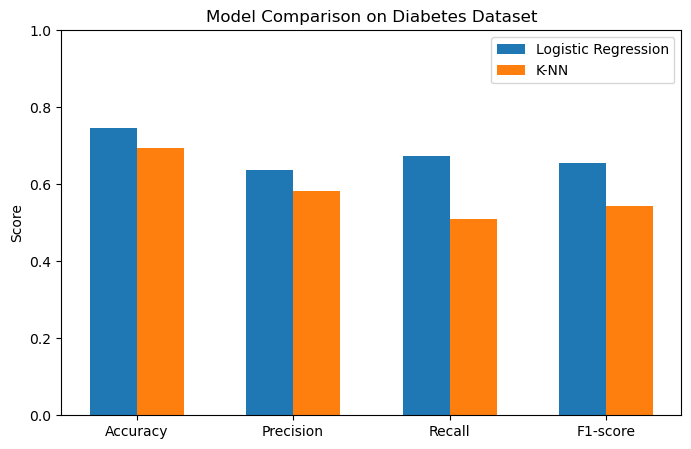

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("diabetes.csv")

# Features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for K-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print metrics
print("Logistic Regression:")
print(f"Accuracy: {acc_lr:.3f}, Precision: {prec_lr:.3f}, Recall: {rec_lr:.3f}, F1-score: {f1_lr:.3f}")

print("\nK-NN:")
print(f"Accuracy: {acc_knn:.3f}, Precision: {prec_knn:.3f}, Recall: {rec_knn:.3f}, F1-score: {f1_knn:.3f}")

# Plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_scores = [acc_lr, prec_lr, rec_lr, f1_lr]
knn_scores = [acc_knn, prec_knn, rec_knn, f1_knn]

x = range(len(metrics))
plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in x], lr_scores, width=0.3, label='Logistic Regression')
plt.bar([i+0.15 for i in x], knn_scores, width=0.3, label='K-NN')
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Model Comparison on Diabetes Dataset')
plt.legend()
plt.show()


### Logistic Regression usually performs slightly better on this dataset because the data is mostly linearly separable and LR is good at generalizing.

### K-NN is sensitive to feature scaling and outliers. It can perform well with complex patterns but may not generalize as well on small test sets.

### From the metrics:

If accuracy and F1-score are higher for Logistic Regression, it’s the preferred model.

If K-NN has higher recall, it could be better for detecting positive cases (important in medical screening).

### Recommendation: For predicting diabetes, Logistic Regression is generally preferred for its simplicity, interpretability, and stable performance.